In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import pickle


from cnnwastedetector.utils import visualize_batch
from cnnwastedetector import Trainer

In [2]:
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if torch.backends.mps.is_available()
    else 'cpu'
)
print(f'Using {device} device')


Using cuda device


In [3]:
vgg16 = models.vgg16(pretrained=True)

for param in vgg16.features.parameters():
    param.requires_grad = False

num_classes = 6
vgg16.classifier[6] = nn.Linear(4096, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
vgg16 = vgg16.to(device)

d:\conda_folder\envs\cnnwastedetector\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\conda_folder\envs\cnnwastedetector\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
loss = nn.CrossEntropyLoss()
optimizer = optim.Adam(vgg16.classifier.parameters(), lr=0.001, weight_decay=1e-4)

In [6]:
trainer = Trainer(vgg16, loss, optimizer)
trainer(5)

Epoch [1/5], Training Loss: 0.9501, Validation Loss: 0.5222, Accuracy: 81.25%
Epoch [2/5], Training Loss: 0.4257, Validation Loss: 1.4052, Accuracy: 90.62%
Epoch [3/5], Training Loss: 0.4829, Validation Loss: 0.9806, Accuracy: 93.75%
Epoch [4/5], Training Loss: 0.5121, Validation Loss: 1.4341, Accuracy: 87.50%
Epoch [5/5], Training Loss: 0.2329, Validation Loss: 3.0738, Accuracy: 96.88%


In [10]:
batch = next(iter(trainer.test_loader))
X = batch[0].to(device)
pred_probab = vgg16(X)
y_pred = pred_probab.argmax(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017212028..1.0259275].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020635007..1.0293211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017212028..1.0293211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.020635007..1.0259275].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017212028..1.0293211].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.017212028..1.0243021].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got rang

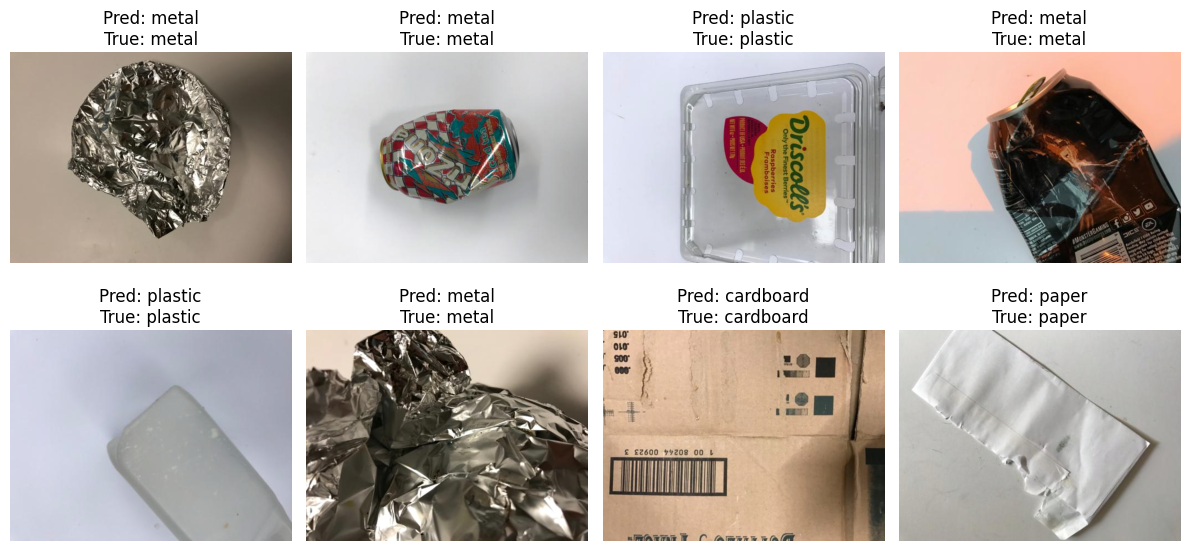

In [11]:
visualize_batch(batch, y_pred)

In [7]:
model_path = '../pickle/vgg16_model.pkl'
with open(model_path, 'wb') as f:
    pickle.dump(vgg16.state_dict(), f)

print(f'Model saved to {model_path}')


Model saved to ../pickle/vgg16_model.pkl
